In [104]:
import numpy as np
import pandas as pd

import plotly.graph_objs as go
from scipy import  stats

import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('6_clear.csv')

#### Interactive plot

For statistical analysis of data we can calculate metrics such as mean, standard Deviation (STD), median, mode, quartiles, interquartile range (IQR). We choose the refractive index column for analysis, as this value is assumed for further prediction.


In [31]:
mean = df['raw_value'].mean()
std = df['raw_value'].std()
median = np.median(df['raw_value'])
mode = stats.mode(df['raw_value'], keepdims=False).mode
quartiles = np.quantile(df['raw_value'], [0.25, 0.5, 0.75])
irq = stats.iqr(df['raw_value'])
print("Mean:", mean)
print("STD:", std)
print("Median:", median)
print("Mode:", mode)
print("Quartiles:", quartiles)
print("IRQ:", irq)

Mean: 1.7947097996265173
STD: 0.6154339947171551
Median: 1.5295
Mode: 3.0
Quartiles: [1.423275 1.5295   1.96    ]
IRQ: 0.5367250000000001


Let's build a histogram in order to evaluate the symmetry of the data and present the results of the statistical analysis

In [59]:
y_max = 0.25

fig_data = [
            go.Scatter(x=[mean]*2,
                       y = [0, y_max],
                       name="mean",
                       marker_color="#86A69D"),
            go.Scatter(x=[median]*2,
                       y = [0, y_max],
                       name="median",
                       marker_color="#F2B263"),
            go.Scatter(x=[mode]*2,
                       y = [0, y_max],
                       name="mode",
                       marker_color="#BB916C"),
            go.Scatter(y=[0.01]*2,
                       x = [quartiles[0], quartiles[-1]],
                       name="IRQ",
                       marker_color="#F28585"),
            go.Histogram(x=df['raw_value'], 
                         histnorm='probability',
                       marker_color="#F2C6C2",
                       name="raw_value",)
            ]

layout = go.Layout(xaxis={"dtick": 1},
                   barmode="stack")
fig = go.Figure(data=fig_data,
                layout=layout)
fig.show()

You can see from the figure that the distribution is not symmetrical and is heavily skewed toward the beginning of the distribution. The mismatch between the mean and the median is also indicative of asymmetry.

Let's build a boxplot since it reflects well the compressed information about the distribution statistics of the available data.


In [60]:
fig_data = [go.Box(y = df['raw_value'],
                   q1=[quartiles[0]], 
                   median=[quartiles[1]],
                   q3=[quartiles[2]], 
                   lowerfence=[df['raw_value'].min()],
                   upperfence=[df['raw_value'].max()], 
                   mean=[mean],
                   sd=[std],
                   marker_color="#F28585"
                  )
           ]
layout = go.Layout(xaxis={"dtick": 1})
fig = go.Figure(data=fig_data,
                layout=layout)
fig.show()

From the boxplot we see that the STD covers a wide range, and the data is heavily skewed toward the low values.

#### Other statistical plots

One common type of plots, are those that reflect the composition of the dataset. For example, we can use a pie chart to show the number of samples measured by each method.

([<matplotlib.patches.Wedge at 0x2378324db10>,
 [Text(0.26360868848889846, 1.0679468429435817, 'el_mylogic'),
  Text(-0.9070410664823909, -0.6223154374708113, 'el_cde_tables'),
  Text(0.34727527620346016, -1.0437432071816375, 'rsc_cde_tables'),
  Text(0.7302706740567392, -0.8226206553525847, 'el_cde_text'),
  Text(0.9501988120632329, -0.5541860856730538, 'rsc_cde_text'),
  Text(1.0492099082286255, -0.33039153814055106, 'snowball'),
  Text(1.0895626502360647, -0.15117285209508774, 'rsc_mylogic'),
  Text(1.098467060453667, -0.05805270965493583, 'springer_cde_table'),
  Text(1.0998816941023937, -0.016132544078617486, 'springer_cde_text')])

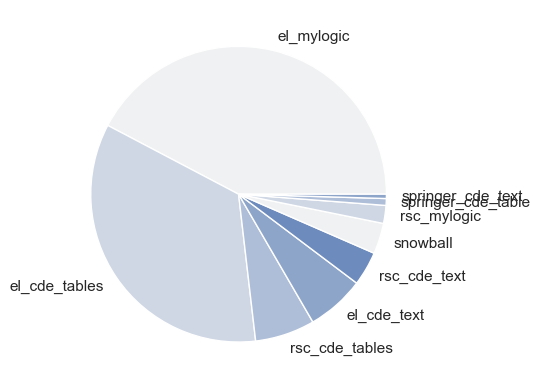

In [121]:
# define Seaborn color palette to use
colors = sns.color_palette('light:b')[ 0:5 ]

# let's build a pie plot
plt.pie(df['measurement_method'].value_counts().values, labels=df['measurement_method'].value_counts().index, colors = colors)

As we can see, in most cases 'el_mylogic' or 'el_cde_tables' were used as the measurement method. 

Let's create a figure showing the dependence of the two parameters of molecular weight and polar surface area. This will also reflect the dependence on the complexity of the structure and the number of heavy atoms.

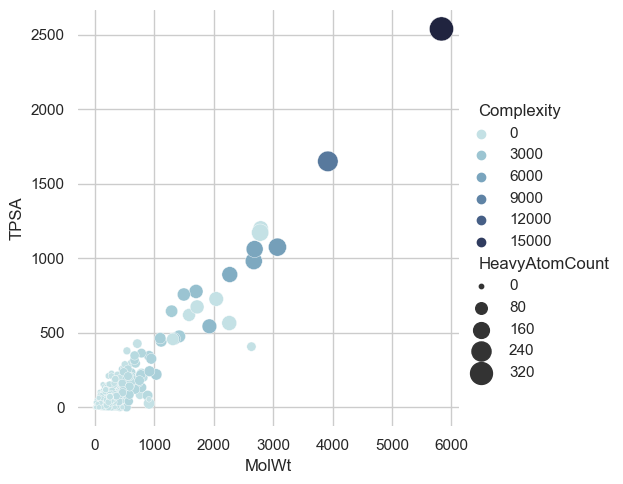

In [120]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x='MolWt', y='TPSA',
    hue='Complexity', size='HeavyAtomCount',
    palette=cmap, sizes=(10, 300),
)
g.despine(left=True, bottom=True)

As we can see, there is a strong linear dependence of surface area on molecular weight, which is logical from a chemical point of view. The same dependence is also observed for the complexity of the structure and the number of heavy atoms. As the molecular weight increases, the surface area, structure complexity, and number of heavy atoms in it increase.

To build a plot reflecting the distribution of the data, let's build a violin plot. To do this, convert one of the parameters into a categorical one.

In [ ]:
# set a new column for the categorical feature and divide the samples into three categories
df['Charge_categorical'] = np.nan

for num in range(len(df['Charge'])):
    if df['Charge'][num] < 0:
        df['Charge_categorical'][num] = 'Negative'
    elif df['Charge'][num] > 0:
        df['Charge_categorical'][num] = 'Positive'
    elif df['Charge'][num] == 0:
        df['Charge_categorical'][num] = 'Neutral'

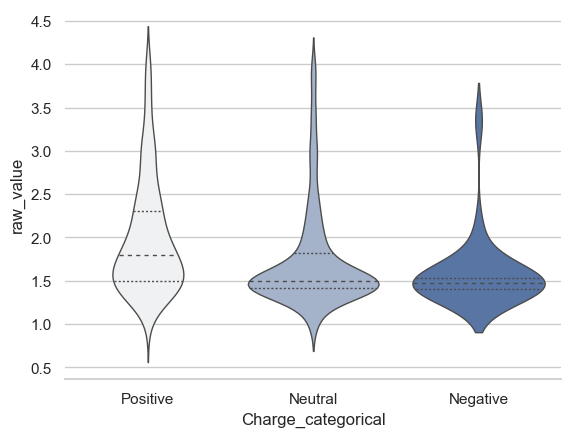

In [101]:
# let's build a violin plot
sns.violinplot(data=df, x='Charge_categorical', y='raw_value', palette="light:b",
                 inner="quart", linewidth=1)
sns.despine(left=True)

Based on the figure, we can say that the samples with neutral or negative charge have similar distributions. At the same time, positively charged samples have a higher value of refractive index, as well as have a broader distribution